In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import scipy
from scipy.stats import ks_2samp
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

# Getting the star formation rates of galaxies

In [3]:
solar_metal = 0.0134

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

In [5]:
all_halo_numbers = np.array(stellar_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH))
halo_no_BH_ind = np.where(np.in1d(all_halo_numbers, halo_with_BH, invert = True))

In [6]:
with_BH = all_halo_numbers[BH_halo_ind]
no_BH = all_halo_numbers[halo_no_BH_ind]

In [7]:
save_numbers = {'halo_with_BH' : with_BH,
                'halo_no_BH' : no_BH,
                'note' : 'halo numbers of halos with BH and no BH'}

f = open('./Data/halo_numbers.pkl', 'wb')
pickle.dump(save_numbers, f)
f.close()

f = open('./Data/halo_numbers.pkl', 'rb')
metal_cut_data = pickle.load(f)
f.close()

In [8]:
stellar_metal = np.array(stellar_metal_data['tot_stellar_metal'])
stellar_metal_no_BH = stellar_metal[halo_no_BH_ind]

stellar_mass = np.array(stellar_metal_data["tot_stellar_mass"])
stellar_mass_no_BH = stellar_mass[halo_no_BH_ind]

BH_stellar_metal = stellar_metal[BH_halo_ind]
BH_stellar_mass = stellar_mass[BH_halo_ind]

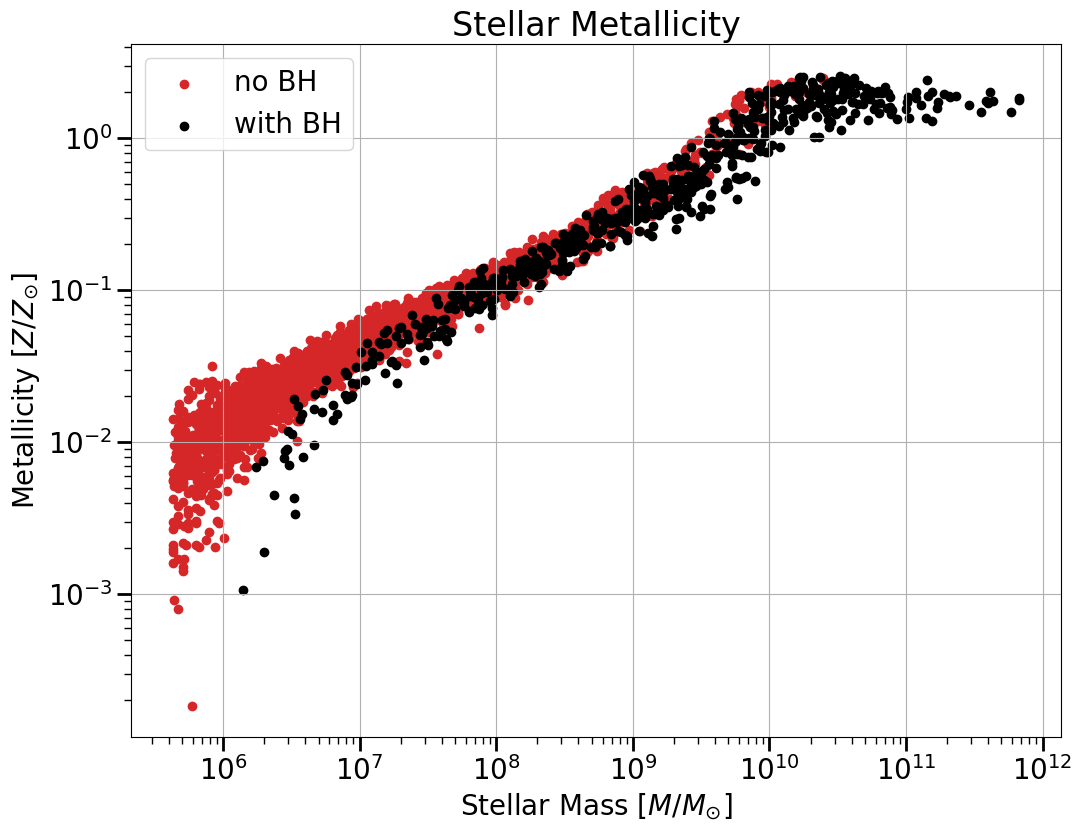

In [21]:
#plotting the stellar metals of halos with BHs
plt.scatter(stellar_mass_no_BH, stellar_metal_no_BH/solar_metal, label = 'no BH', color = 'tab:red')
plt.scatter(BH_stellar_mass, BH_stellar_metal/solar_metal, color = "black", label = "with BH")


plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e7, 1e10])
#plt.ylim([1e-1, 1e0])

plt.title('Stellar Metallicity')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Metallicity $[Z/Z_{\odot}]$')
plt.grid()

plt.legend()
#plt.show()
plt.savefig("./Pictures/stellar_metal_BH.png", bbox_inches='tight')

## Getting the galaxies with high metallicity and no BH

Fuck it we making a function

In [10]:
def big_get_halo_ind(arr1, num, i):
    x = []
    if arr1[i] > num:
        x = np.append(x, i)
    return x

In [11]:
def small_get_halo_ind(arr1, num2, i):
    x = []
    if arr1[i] < num2:
        x = np.append(x, i)
    return x

## To find the metals

In [12]:
loop1 = np.arange(len(BH_stellar_metal))
loop2 = np.arange(len(stellar_metal_no_BH))
ind_large = []
ind_small = []
ind_small_BH = []
ind_large_BH = []

for i in loop2:
        ind_large = np.append(ind_large, big_get_halo_ind(stellar_metal_no_BH/solar_metal, 0.3, i))
        ind_small = np.append(ind_small, small_get_halo_ind(stellar_metal_no_BH/solar_metal, 0.3, i))
        
for k in loop1:
        ind_small_BH = np.append(ind_small_BH, small_get_halo_ind(BH_stellar_metal/solar_metal, 0.3, k))
        ind_large_BH =  np.append(ind_large_BH, big_get_halo_ind(BH_stellar_metal/solar_metal, 0.3, k))

In [13]:
ind_large = ind_large.astype(int)
ind_small = ind_small.astype(int)
ind_small_BH = ind_small_BH.astype(int)
ind_large_BH = ind_large_BH.astype(int)

In [14]:
stellar_mass_ind_large = stellar_mass_no_BH[ind_large]
stellar_mass_ind_small = stellar_mass_no_BH[ind_small]
BH_stellar_mass_ind_small = BH_stellar_mass[ind_small_BH]

stellar_metal_large = stellar_metal_no_BH[ind_large]
stellar_metal_small = stellar_metal_no_BH[ind_small]
BH_stellar_metal_small = BH_stellar_metal[ind_small_BH]

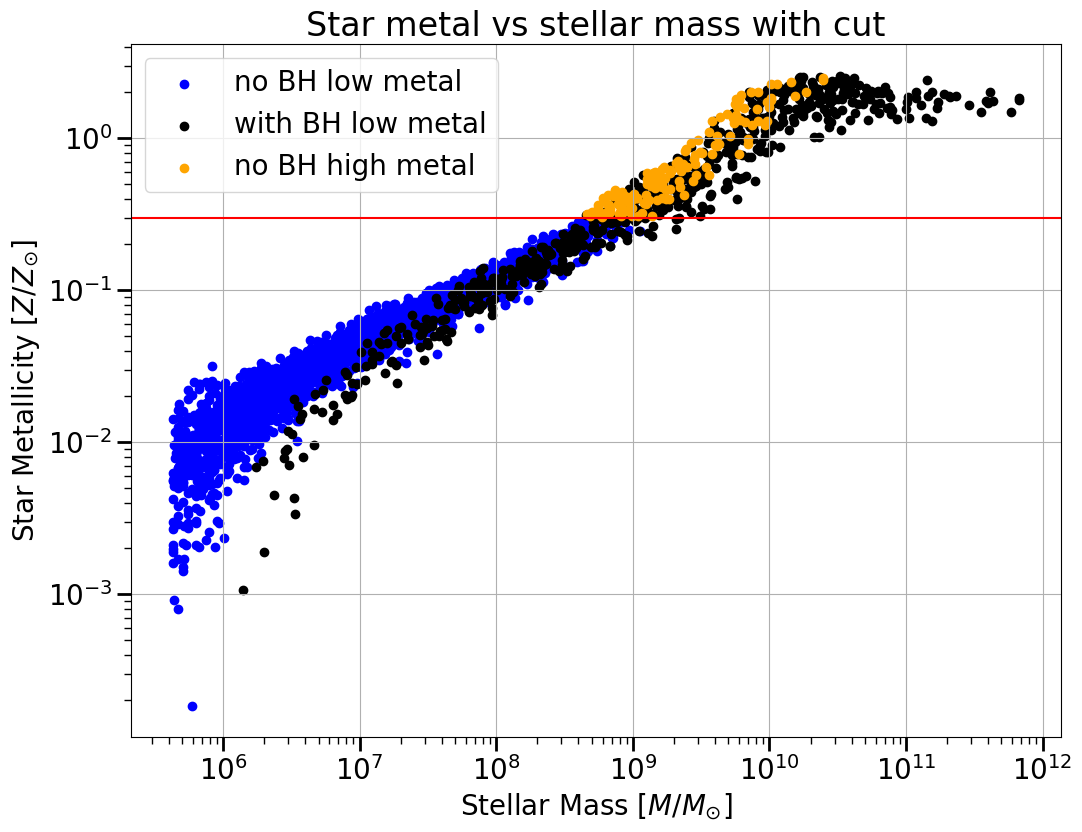

In [15]:
#plt.scatter(stellar_mass_ind_large, stellar_metal_large/solar_metal, label = 'no BH high metal', color = 'orange')
plt.scatter(stellar_mass_ind_small, stellar_metal_small/solar_metal, label = 'no BH low metal', color = 'blue')
plt.scatter(BH_stellar_mass, BH_stellar_metal/solar_metal, color = "black", label = 'with BH low metal')
plt.scatter(stellar_mass_ind_large, stellar_metal_large/solar_metal, label = 'no BH high metal', color = 'orange')

plt.axhline(y = 0.3, color = 'red')

plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e7, 1e10])
#plt.ylim([1e-1, 1e0])

plt.title('Star metal vs stellar mass with cut')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('Star Metallicity $[Z/Z_{\odot}]$')

plt.grid()
plt.legend()
#plt.show()
plt.savefig("./Pictures/star_cut.png", bbox_inches='tight')

## Soliiid okay, now we need to find the halo numbers

In [16]:
halo_no_BH_high = no_BH[ind_large]
halo_no_BH_low = no_BH[ind_small]
halo_BH_low = with_BH[ind_small_BH]
halo_BH_high = with_BH[ind_large_BH]

In [17]:
numbers_cut_data = {"high_metal_no_BH": halo_no_BH_high,
                  'low_metal_no_BH': halo_no_BH_low,
                  'low_metal_BH': halo_BH_low,
                  'note': 'Halo numbers of the metal cut. Low = Z < 0.3. High = Z > 0.3'}

f = open('./Data/numbers_cut.pkl', 'wb')
pickle.dump(numbers_cut_data, f)
f.close()

f = open('./Data/numbers_cut.pkl', 'rb')
metal_cut_data = pickle.load(f)
f.close()

In [18]:
stellar_metal_prof_cut = {'no_BH_stellar_high': stellar_metal_large,
                      'no_BH_stellar_low': stellar_metal_small,
                      'BH_stellar_low': BH_stellar_metal_small,
                          'halo_num_high_metal_no_BH': halo_no_BH_high,
                  'halo_num_low_metal_no_BH': halo_no_BH_low,
                  'halo_num_low_metal_BH': halo_BH_low,
                         'halo_num_high_metal_BH' : halo_BH_high}

f = open('./Data/star_metal_prof_cut.pkl', 'wb')
pickle.dump(stellar_metal_prof_cut, f)
f.close()

f = open('./Data/star_metal_prof_cut.pkl', 'rb')
star_metal_prof_cut_data = pickle.load(f)
f.close()